# Project3 - Red Wine Quality Prediction

# Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues,
only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, 
wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal
wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to 
test feature selection methods.

# Imorting all the necessary libraries:

In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the Data Set:

In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Attribute Information:
There are 1599 rows and 12 columns in the above daa set in which-

Input variables (based on physicochemical tests):
1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol


Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [4]:
 #To get the data dimension 
df.shape

(1599, 12)

In [5]:
#To get all the information regarding data set:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From the above Code we have the Columns Data types and Memory used by the Data frame.

In [6]:
df['quality'].value_counts() #To check the count of values in target variable('quality')

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Converting target variable('quality') values into classification as good quality or bad quality:

In [7]:
df['quality']=np.where((df['quality']>=7),'good','bad') 

In [8]:
df['quality'].value_counts() #To check the count of values in target variable('quality')

bad     1382
good     217
Name: quality, dtype: int64

In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [10]:
df.isnull().sum() #checking the null value count of all the coulumns

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values in the dataset

# Describing Data Sets:

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


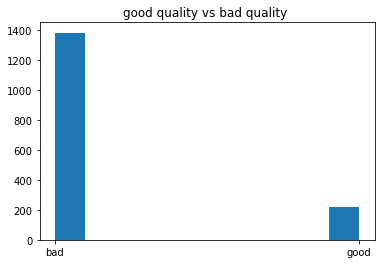

In [12]:
df['quality'].hist(grid=False)
plt.title('good quality vs bad quality ')
plt.show()

There is imbalance problem which need to be resolved futher

# Label Encoding:

In [13]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['quality']=LE.fit_transform(df['quality'])
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

label Encoder is needeed to convert 'quality' target variable in to numeric values so that it is used to check correlaion of feautures and label

# Since there is Imbalance we use different techniques to resolve this problem:

In [14]:
#Splitting the dataset into features and target variables:
x=df.drop('quality',axis=1)
y=df.quality


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75,random_state=41)

In [16]:
from collections import Counter # to get the count 
Counter(y_train)

Counter({0: 328, 1: 71})

In [17]:
import six
import sys
sys.modules['sklearn.external.six']=six
from imblearn.over_sampling import SMOTE

In [18]:
sm=SMOTE()
over_samp=SMOTE(0.80)
x_train_ns,y_train_ns=over_samp.fit_sample(x_train,y_train)

In [19]:
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({0: 328, 1: 71})
Counter({0: 328, 1: 262})


Using SMOTE technique we removed imbalance problem of dataset.

# Correlation:

# Correlation Using Heatmap:

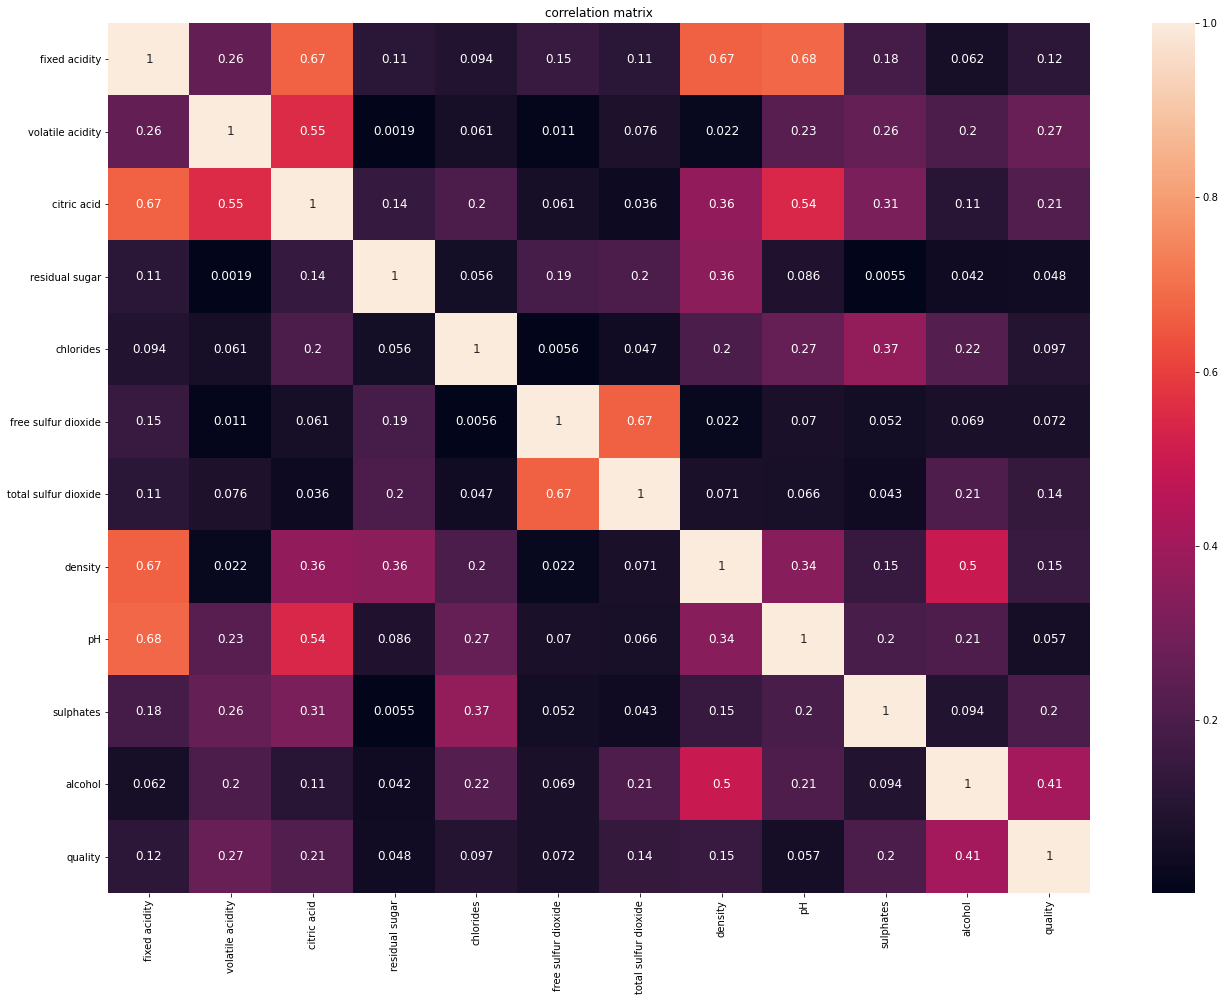

In [20]:
df_corr=df.corr().abs()

plt.figure(figsize=(22,16))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.title('correlation matrix')
plt.show()    

# Outcome of Correlation:
All the columns of the dataset is positively correlated with the target column.

Maximun correlated feature:alcohol

minimun correlated feature:residual sugar

In [21]:
corr=df.corr()
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: quality, dtype: float64

correlation of all the features with respect to the target variable is given above

# Checking outliers:

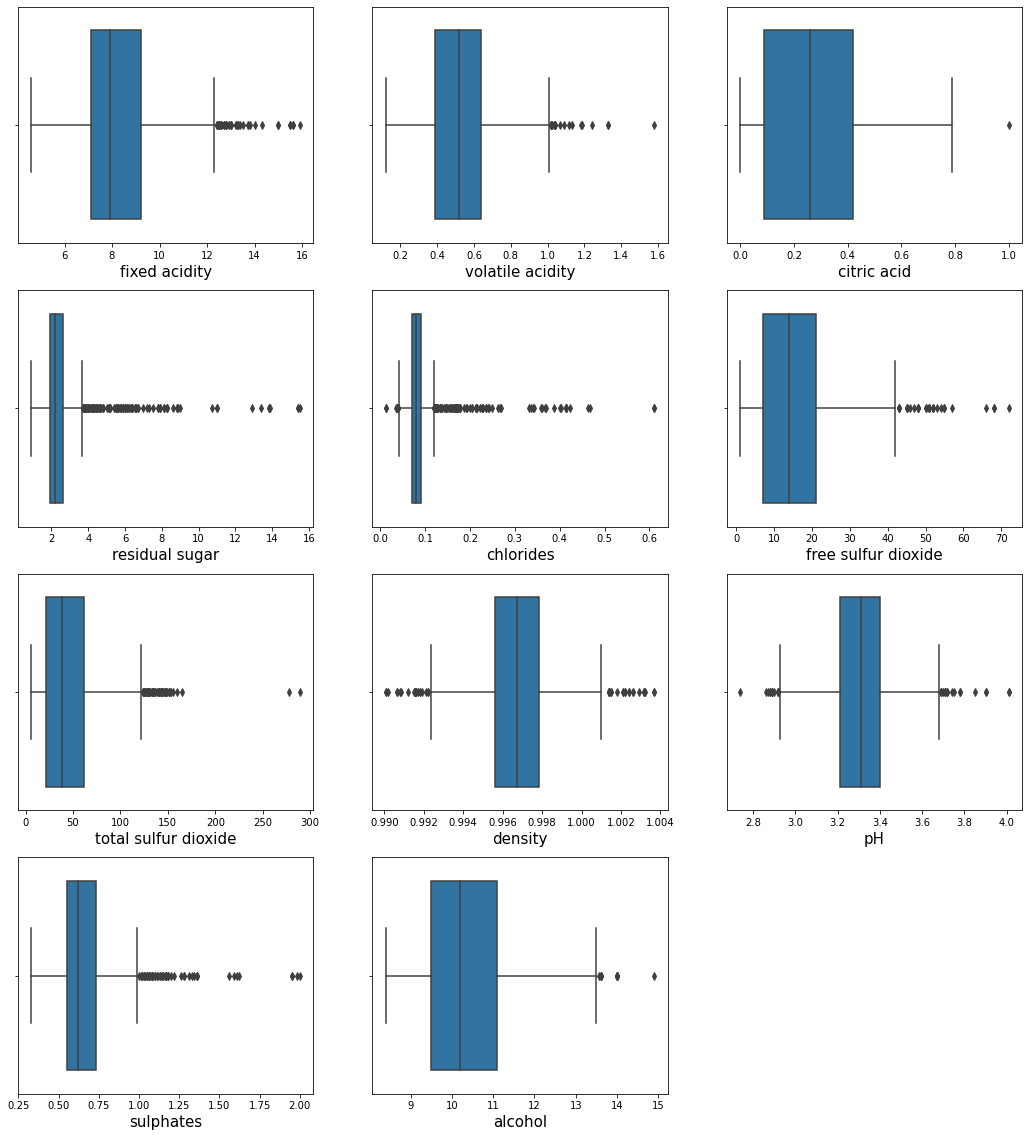

In [22]:
x=df.drop(columns=['quality'])
plt.figure(figsize=(18,20))
graph=1
for column in x:
    if graph<=12:
        ax=plt.subplot(4,3,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()    

From the above outcome we can see that almost all the columns has outliers but,we can see that columns like 

residual sugar,chlorides,free sulphur dioxide,density and sulphates has more outliers and these can effect the score.


# Skewness:

In [23]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

Skewness threshold is taken as +/-0.5.Columns which are having skewness which effects the model are:

free sulfur dioxide,residual sugar,chlorides,total sulfur dioxide,sulphates         


# Feature selection method:

In [24]:
from sklearn.feature_selection import SelectKBest,f_classif

x=df.drop('quality',axis=1)
y=df.quality

best_features=SelectKBest(score_func=f_classif,k=7)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_name','Score']

feature_scores.nlargest(7,'Score')

,Feature_name,Score
10,alcohol,317.650903
1,volatile acidity,126.290916
2,citric acid,77.184567
9,sulphates,66.185378
7,density,36.990465
6,total sulfur dioxide,31.702481
0,fixed acidity,23.356885


These are the best and top 7 features which contributes best score.

# Creating a new data frame using feature selected columns and target variable:

In [25]:
df_new=df[['alcohol','volatile acidity','citric acid','sulphates','density','total sulfur dioxide','fixed acidity','quality']]
df_new

,alcohol,volatile acidity,citric acid,sulphates,density,total sulfur dioxide,fixed acidity,quality
0,9.4,0.700,0.00,0.56,0.99780,34.0,7.4,0
1,9.8,0.880,0.00,0.68,0.99680,67.0,7.8,0
2,9.8,0.760,0.04,0.65,0.99700,54.0,7.8,0
3,9.8,0.280,0.56,0.58,0.99800,60.0,11.2,0
4,9.4,0.700,0.00,0.56,0.99780,34.0,7.4,0
...,...,...,...,...,...,...,...,...
1594,10.5,0.600,0.08,0.58,0.99490,44.0,6.2,0
1595,11.2,0.550,0.10,0.76,0.99512,51.0,5.9,0
1596,11.0,0.510,0.13,0.75,0.99574,40.0,6.3,0
1597,10.2,0.645,0.12,0.71,0.99547,44.0,5.9,0


# Removing Outliers using Z score Technique:


In [26]:
from scipy.stats import zscore
import numpy as np
zsc=zscore(df_new)
abs_z_score=np.abs(zsc)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df_new[filtering_entry]


In [27]:
df

,alcohol,volatile acidity,citric acid,sulphates,density,total sulfur dioxide,fixed acidity,quality
0,9.4,0.700,0.00,0.56,0.99780,34.0,7.4,0
1,9.8,0.880,0.00,0.68,0.99680,67.0,7.8,0
2,9.8,0.760,0.04,0.65,0.99700,54.0,7.8,0
3,9.8,0.280,0.56,0.58,0.99800,60.0,11.2,0
4,9.4,0.700,0.00,0.56,0.99780,34.0,7.4,0
...,...,...,...,...,...,...,...,...
1594,10.5,0.600,0.08,0.58,0.99490,44.0,6.2,0
1595,11.2,0.550,0.10,0.76,0.99512,51.0,5.9,0
1596,11.0,0.510,0.13,0.75,0.99574,40.0,6.3,0
1597,10.2,0.645,0.12,0.71,0.99547,44.0,5.9,0


There are only 1517 rows and 8 columns afer removing the outliers

# Percentage data loss:

In [1]:
loss_percent=(1599-1517)/1599*100
loss_percent

5.128205128205128

# Dividing the features and label columns as 'x' and 'y' and scaling the features:

In [29]:
x=df.drop(columns='quality')
y=df.quality

In [30]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)


# Finding the best Random State:

In [31]:
knn=KNeighborsClassifier()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    knn.fit(x_train,y_train)
    pred_test=knn.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
        
print('Best accuracy is: ',maxacc,'Best state is: ',maxrs)

Best accuracy is:  0.9243421052631579 Best state is:  27


We have found that best random state is '27'. We will create our train-test split using this random state.

# Creating train-test split:

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=27)


# Balancing the data set:

In [33]:
import six
import sys
sys.modules['sklearn.external.six']=six
from imblearn.over_sampling import SMOTE

sm=SMOTE()
over_samp=SMOTE(0.80)
x_train_ns,y_train_ns=over_samp.fit_sample(x_train,y_train)

# KNeighborsClassifier: 

In [34]:
from sklearn.metrics import classification_report
knn.fit(x_train_ns,y_train_ns)
pred_test=knn.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8322368421052632
confusion_matrix: 
 [[223  45]
 [  6  30]]
classification report:                precision    recall  f1-score   support

           0       0.97      0.83      0.90       268
           1       0.40      0.83      0.54        36

    accuracy                           0.83       304
   macro avg       0.69      0.83      0.72       304
weighted avg       0.91      0.83      0.86       304



# DecisionTreeClassifier:

In [35]:
clf1=DecisionTreeClassifier()
clf1.fit(x_train_ns,y_train_ns)
pred_test=clf1.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8947368421052632
confusion_matrix: 
 [[248  20]
 [ 12  24]]
classification report:                precision    recall  f1-score   support

           0       0.95      0.93      0.94       268
           1       0.55      0.67      0.60        36

    accuracy                           0.89       304
   macro avg       0.75      0.80      0.77       304
weighted avg       0.91      0.89      0.90       304



# RandomForestClassifier:

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(x_train_ns,y_train_ns)
pred_test=clf.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.9210526315789473
confusion_matrix: 
 [[255  13]
 [ 11  25]]
classification report:                precision    recall  f1-score   support

           0       0.96      0.95      0.96       268
           1       0.66      0.69      0.68        36

    accuracy                           0.92       304
   macro avg       0.81      0.82      0.82       304
weighted avg       0.92      0.92      0.92       304



Knn Model, Decision Tree Classifier and Random Forest Classifier are producing good accuracy.

Now we will check cross validation score as well as overfiting if exists

# CrossValidation Score:

In [37]:
from sklearn.model_selection import cross_val_score
csv=cross_val_score(knn,x_scaled,y,cv=5)
print('cross validation score of knn model is:',csv.mean())

cross validation score of knn model is: 0.8661803022407504


In [38]:
csv=cross_val_score(clf1,x_scaled,y,cv=5)
print('cross validation score of decision tree model is:',csv.mean())

cross validation score of decision tree model is: 0.8391458224769845


In [39]:
csv=cross_val_score(clf,x_scaled,y,cv=5)
print('cross validation score of Ranom forest classifier model is:',csv.mean())

cross validation score of Ranom forest classifier model is: 0.8826624109779398


Random Forest Classifier is performing better among all so we will continue with Random Forest Classifier

# HyperParameterTuning:

In [44]:
from sklearn.model_selection import GridSearchCV
params={    'criterion':['gini','entropy'],
            'max_depth':[10,15],
            'min_samples_split':[10,11],
            'min_samples_leaf':[5,6]
           }
gri=GridSearchCV(clf,param_grid=params,cv=5,scoring='accuracy')
gri.fit(x_train_ns,y_train_ns)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11]},
             scoring='accuracy')

In [45]:
print(gri.best_params_)
gri_pred=gri.best_estimator_.predict(x_test)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [46]:
accuracy_score(y_test,gri_pred)

0.9144736842105263

# ROC AUC Plot:

<function matplotlib.pyplot.show(close=None, block=None)>

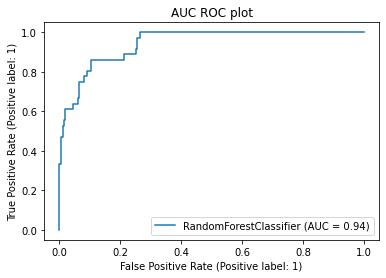

In [47]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gri.best_estimator_,x_test,y_test)
plt.title('AUC ROC plot')
plt.show

Final accuracy is 91% and AUC score is 94% which is decently good.

#  Saving the model:

In [51]:
import pickle
filename='redwinequality.pkl'
pickle.dump(gri.best_estimator_,open(filename,'wb'))


# Conclusion:

In [49]:
import numpy as np
a=np.array(y_test)
predicted=np.array(gri.best_estimator_.predict(x_test))
df_conclusion=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df_conclusion

,Original,Predicted
0,0,0
1,1,1
2,0,0
3,1,0
4,0,0
...,...,...
299,0,0
300,0,0
301,0,0
302,0,0
